/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv
App with the highest reviews: Facebook
Free Apps: 10039, Paid Apps: 800


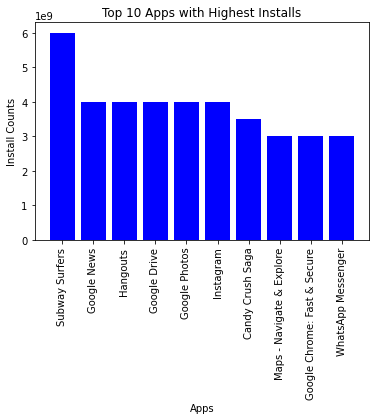

App with the largest size: Word Search Tab 1 FR


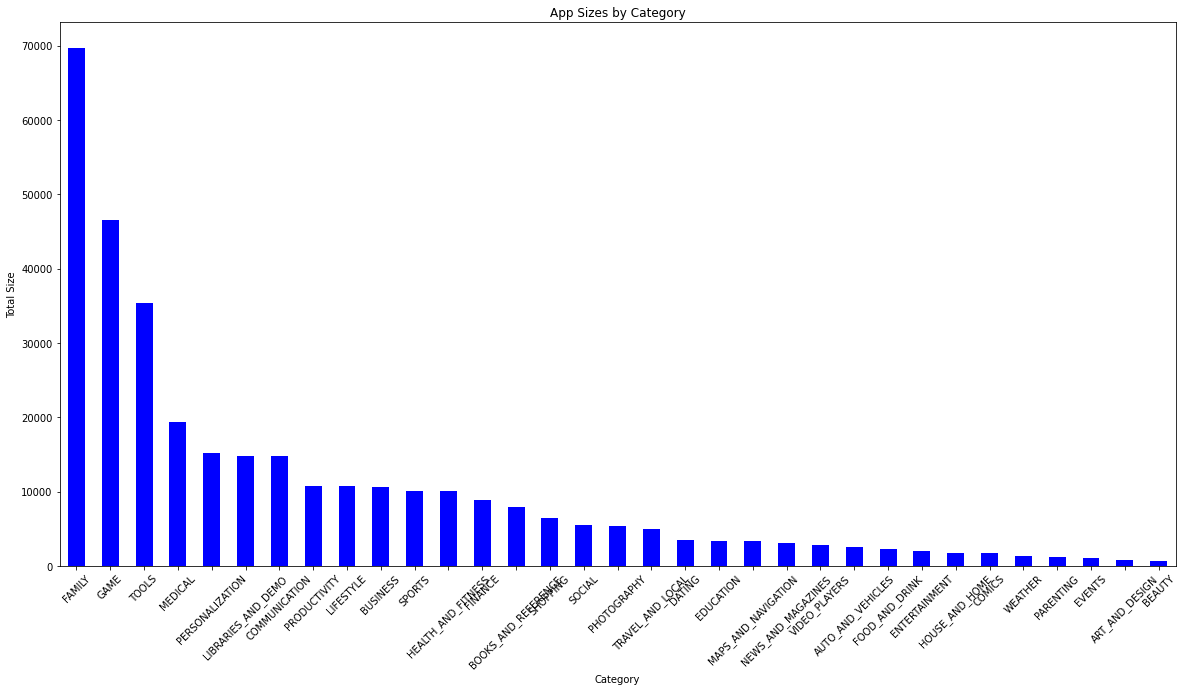

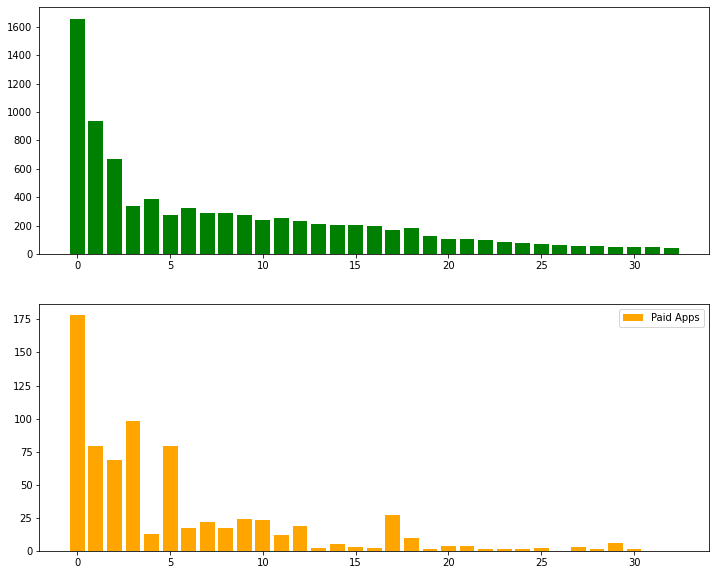

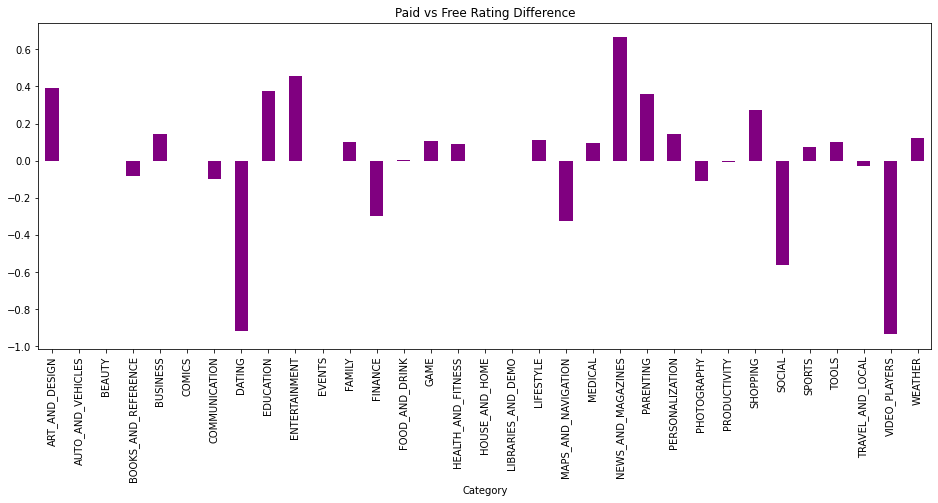

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# List all files in the given directory (useful for environments like Kaggle)
for root_dir, _, files in os.walk('/kaggle/input'):
    for file in files:
        print(os.path.join(root_dir, file))

# Load dataset
app_data = pd.read_csv("/kaggle/input/google-play-store-apps/googleplaystore.csv", encoding='utf-8')

# Convert 'Reviews' to numeric and handle errors by coercing invalid entries to NaN
app_data['Reviews'] = pd.to_numeric(app_data['Reviews'], errors='coerce')

# App with the highest number of reviews
most_reviewed_app = app_data.sort_values('Reviews', ascending=False).iloc[0]['App']
print(f"App with the highest reviews: {most_reviewed_app}")

# Free vs Paid Apps Count
free_apps_count = len(app_data[app_data['Type'] == "Free"])
paid_apps_count = len(app_data[app_data['Type'] == "Paid"])
print(f"Free Apps: {free_apps_count}, Paid Apps: {paid_apps_count}")

# Preprocess 'Installs' column
app_data['Installs'] = app_data['Installs'].str.replace(',', '').str.rstrip('+').astype(str)

# Remove invalid rows
invalid_rows = app_data[app_data['Category'] == '1.9'].index
app_data.drop(index=invalid_rows, inplace=True)

# Convert 'Installs' to integers
app_data['Installs'] = pd.to_numeric(app_data['Installs'], errors='coerce')

# Top 10 apps by install count
top_apps_by_installs = (
    app_data.groupby('App')['Installs']
    .sum()
    .reset_index()
    .sort_values(by='Installs', ascending=False)
    .head(10)
)

# Plot the top apps by installs
plt.bar(top_apps_by_installs['App'], top_apps_by_installs['Installs'], color='blue')
plt.xlabel("Apps")
plt.xticks(rotation=90)
plt.ylabel("Install Counts")
plt.title("Top 10 Apps with Highest Installs")
plt.show()

# Cleaning and converting 'Size' column
app_data['Size'] = (
    app_data['Size']
    .str.replace('M', '')
    .str.replace('k', '')
    .str.replace('+', '')
)

# Remove rows where size is "Varies with device"
size_varied_rows = app_data[app_data['Size'] == 'Varies with device']
app_data.drop(index=size_varied_rows.index, inplace=True)

# Convert 'Size' to numeric
app_data['Size'] = pd.to_numeric(app_data['Size'], errors='coerce')

# App with the largest size
largest_app_by_size = app_data.sort_values('Size', ascending=False).iloc[0]['App']
print(f"App with the largest size: {largest_app_by_size}")

# Most popular category by size
category_size_agg = (
    app_data.groupby('Category')['Size']
    .sum()
    .reset_index()
    .sort_values(by='Size', ascending=False)
)

# Plot size distribution by category
category_size_agg.set_index('Category').plot(
    kind='bar', figsize=(20, 10), color='blue', legend=None
)
plt.xlabel("Category")
plt.ylabel("Total Size")
plt.title("App Sizes by Category")
plt.xticks(rotation=45)
plt.show()

# Free and Paid Apps analysis
def count_app_types(data):
    """Compute counts of free and paid apps in the dataset."""
    return data['Type'].value_counts().get('Free', 0), data['Type'].value_counts().get('Paid', 0)

def plot_app_distribution(data):
    """Plot app distribution across categories for free and paid apps."""
    category_counts = data['Category'].value_counts()
    free_apps, paid_apps = [], []
    
    for category in category_counts.index:
        free_count, paid_count = count_app_types(data.query(f"Category == '{category}'"))
        free_apps.append(free_count)
        paid_apps.append(paid_count)

    fig, axes = plt.subplots(2, 1, figsize=(12, 10))
    axes[0].bar(range(len(free_apps)), free_apps, color='green', label='Free Apps')
    axes[1].bar(range(len(paid_apps)), paid_apps, color='orange', label='Paid Apps')
    plt.legend()
    plt.show()

plot_app_distribution(app_data)

# Visualize Rating Distribution
def analyze_ratings(data, app_type):
    """Analyze ratings for a given app type (Free or Paid)."""
    filtered_data = data.query(f"Type == '{app_type}'")
    return (
        filtered_data.groupby('Category')['Rating']
        .mean()
        .reset_index()
        .sort_values('Rating', ascending=False)
    )

paid_ratings = analyze_ratings(app_data, 'Paid')
free_ratings = analyze_ratings(app_data, 'Free')

rating_diff = paid_ratings.set_index('Category')['Rating'] - free_ratings.set_index('Category')['Rating']
rating_diff.plot(kind='bar', figsize=(16, 6), color='purple', title="Paid vs Free Rating Difference")
plt.xticks(rotation=90)
plt.show()
